In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow # install the tensorflow library
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset(2010-2023)/DL002.csv')
df

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,O Xylene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),AT (degree C)
0,2010-01-01 00:00:00,2010-01-01 01:00:00,NaN,NaN,68.69,132.78,201.47,NaN,3.20,1.21,...,18.92,11.70,84.33,0.37,51.97,100.76,957.94,0.20,NaN,NaN
1,2010-01-01 01:00:00,2010-01-01 02:00:00,NaN,NaN,12.42,65.33,77.75,NaN,1.03,NaN,...,3.36,11.50,83.70,0.42,79.32,114.72,956.52,0.20,NaN,NaN
2,2010-01-01 02:00:00,2010-01-01 03:00:00,NaN,NaN,7.48,40.04,47.51,NaN,4.92,NaN,...,NaN,11.10,85.17,0.46,91.75,123.42,952.03,0.17,NaN,NaN
3,2010-01-01 03:00:00,2010-01-01 04:00:00,NaN,NaN,4.22,27.98,32.20,NaN,5.59,NaN,...,0.32,10.47,86.72,0.22,64.99,104.67,962.79,0.17,NaN,NaN
4,2010-01-01 04:00:00,2010-01-01 05:00:00,NaN,NaN,12.91,32.46,45.37,NaN,5.57,NaN,...,NaN,10.04,86.97,0.19,47.37,80.95,969.16,0.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116107,2023-03-31 19:00:00,2023-03-31 20:00:00,77.65,125.10,7.31,17.23,15.79,85.65,2.30,0.74,...,1.33,18.89,68.84,0.86,98.39,20.02,NaN,0.16,NaN,NaN
116108,2023-03-31 20:00:00,2023-03-31 21:00:00,58.73,127.63,7.33,17.62,15.44,83.77,0.90,0.85,...,1.35,18.94,69.26,0.36,48.92,20.23,NaN,0.17,NaN,NaN
116109,2023-03-31 21:00:00,2023-03-31 22:00:00,54.85,131.57,7.22,17.34,15.74,87.55,0.90,0.43,...,1.35,18.98,69.49,0.57,81.23,20.18,NaN,0.16,NaN,NaN
116110,2023-03-31 22:00:00,2023-03-31 23:00:00,42.52,129.57,7.50,16.99,15.99,84.04,0.90,0.40,...,1.31,19.00,71.61,0.79,117.05,20.00,NaN,0.17,NaN,NaN


In [5]:
df.index = pd.to_datetime(df['From Date'], format='%Y-%m-%d %H:%M:%S')
df[:26]

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,O Xylene (ug/m3),Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),AT (degree C)
From Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:00:00,2010-01-01 01:00:00,NaN,NaN,68.69,132.78,201.47,NaN,3.20,1.21,...,18.92,11.70,84.33,0.37,51.97,100.76,957.94,0.20,NaN,NaN
2010-01-01 01:00:00,2010-01-01 01:00:00,2010-01-01 02:00:00,NaN,NaN,12.42,65.33,77.75,NaN,1.03,NaN,...,3.36,11.50,83.70,0.42,79.32,114.72,956.52,0.20,NaN,NaN
2010-01-01 02:00:00,2010-01-01 02:00:00,2010-01-01 03:00:00,NaN,NaN,7.48,40.04,47.51,NaN,4.92,NaN,...,NaN,11.10,85.17,0.46,91.75,123.42,952.03,0.17,NaN,NaN
2010-01-01 03:00:00,2010-01-01 03:00:00,2010-01-01 04:00:00,NaN,NaN,4.22,27.98,32.20,NaN,5.59,NaN,...,0.32,10.47,86.72,0.22,64.99,104.67,962.79,0.17,NaN,NaN
2010-01-01 04:00:00,2010-01-01 04:00:00,2010-01-01 05:00:00,NaN,NaN,12.91,32.46,45.37,NaN,5.57,NaN,...,NaN,10.04,86.97,0.19,47.37,80.95,969.16,0.20,NaN,NaN
2010-01-01 05:00:00,2010-01-01 05:00:00,2010-01-01 06:00:00,NaN,NaN,23.52,42.91,66.43,NaN,4.95,1.53,...,0.67,9.51,88.15,0.25,47.91,69.74,967.64,0.20,NaN,NaN
2010-01-01 06:00:00,2010-01-01 06:00:00,2010-01-01 07:00:00,NaN,NaN,8.96,33.28,42.24,NaN,2.21,2.15,...,NaN,9.27,87.94,0.25,94.78,70.01,968.35,0.17,NaN,NaN
2010-01-01 07:00:00,2010-01-01 07:00:00,2010-01-01 08:00:00,NaN,NaN,12.16,33.53,45.70,NaN,2.49,2.97,...,0.28,9.22,88.10,0.29,65.44,94.00,964.12,0.17,NaN,NaN
2010-01-01 08:00:00,2010-01-01 08:00:00,2010-01-01 09:00:00,NaN,NaN,26.27,43.60,69.87,NaN,3.40,1.69,...,0.47,10.66,83.26,0.61,58.27,170.73,964.59,0.20,NaN,NaN


<Axes: xlabel='From Date'>

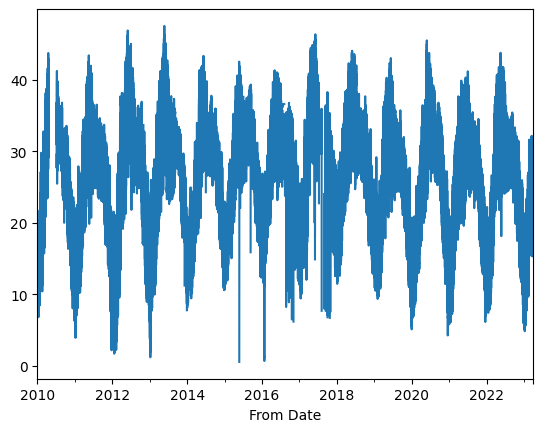

In [6]:
temp = df['Temp (degree C)']
temp.plot()

In [7]:
df.isnull().sum()

,0
From Date,0
To Date,0
PM2.5 (ug/m3),52035
PM10 (ug/m3),93179
NO (ug/m3),15008
NO2 (ug/m3),14642
NOx (ppb),12646
NH3 (ug/m3),93309
SO2 (ug/m3),13202
CO (mg/m3),32214


In [8]:
# df_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)
# temp = df_interpolated['Temp (degree C)']
# temp.plot()
df = df.fillna(method='ffill')
temp = df['Temp (degree C)']

<ipython-input-8-bb556d6094e5>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


<Axes: xlabel='From Date'>

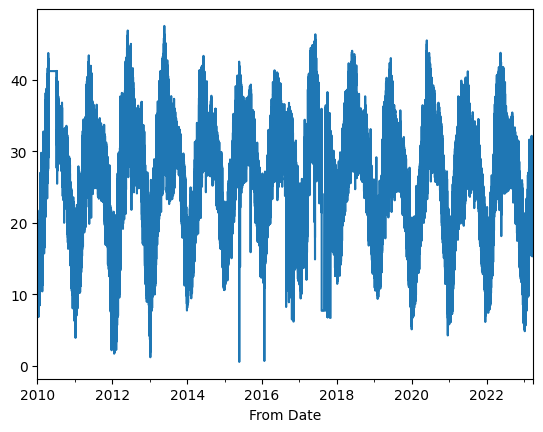

In [9]:
temp = df['Temp (degree C)']
temp.plot()

In [10]:
df.isnull().sum()

,0
From Date,0
To Date,0
PM2.5 (ug/m3),45785
PM10 (ug/m3),92196
NO (ug/m3),0
NO2 (ug/m3),0
NOx (ppb),0
NH3 (ug/m3),66994
SO2 (ug/m3),0
CO (mg/m3),0


In [11]:
# {            X            } {y}
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((116107, 5, 1), (116107,))

In [13]:
X1[:5]

array([[[11.7 ],
        [11.5 ],
        [11.1 ],
        [10.47],
        [10.04]],

       [[11.5 ],
        [11.1 ],
        [10.47],
        [10.04],
        [ 9.51]],

       [[11.1 ],
        [10.47],
        [10.04],
        [ 9.51],
        [ 9.27]],

       [[10.47],
        [10.04],
        [ 9.51],
        [ 9.27],
        [ 9.22]],

       [[10.04],
        [ 9.51],
        [ 9.27],
        [ 9.22],
        [10.66]]])

In [14]:
y1[:5]

array([ 9.51,  9.27,  9.22, 10.66, 12.81])

In [15]:
train_size = int(len(X1) * 0.6)
val_size = int(len(X1) * 0.2)
X_train1, y_train1 = X1[:train_size], y1[:train_size]
X_val1, y_val1 = X1[train_size:train_size+val_size], y1[train_size:train_size+val_size]
X_test1, y_test1 = X1[train_size+val_size:], y1[train_size+val_size:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((69664, 5, 1), (69664,), (23221, 5, 1), (23221,), (23222, 5, 1), (23222,))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import os

In [18]:
os.makedirs('model1', exist_ok=True)

cp1 = ModelCheckpoint('model1/model_checkpoint.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [19]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 538.8718 - root_mean_squared_error: 23.0594 - val_loss: 80.0991 - val_root_mean_squared_error: 8.9498
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 50.6444 - root_mean_squared_error: 7.0244 - val_loss: 4.2571 - val_root_mean_squared_error: 2.0633
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 4.3539 - root_mean_squared_error: 2.0754 - val_loss: 0.9337 - val_root_mean_squared_error: 0.9663
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 1.2677 - root_mean_squared_error: 1.1256 - val_loss: 0.6458 - val_root_mean_squared_error: 0.8036
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.0819 - root_mean_squared_error: 1.0394 - val_loss: 0.5927 - val_root_mean_squared_error: 0.7699
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 1.0077 - root_mean_squared_error: 1.0035 - val_loss: 0.5590 - val_root_mean_squared_error: 0.7477
Epoch 7/10
2177/2177 ━━━━━━━

In [20]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model_checkpoint.keras')

In [21]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

2177/2177 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


,Train Predictions,Actuals
0,9.961106,9.51
1,9.409113,9.27
2,9.373450,9.22
3,9.502540,10.66
4,12.177073,12.81
...,...,...
69659,20.640686,20.31
69660,19.623161,19.70
69661,19.296844,19.52
69662,19.520617,19.37


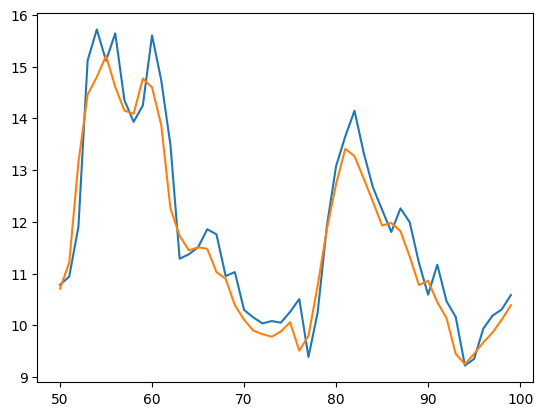

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [23]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


,Val Predictions,Actuals
0,19.325098,18.71
1,18.431095,18.59
2,18.606701,18.59
3,18.779284,13.72
4,11.883742,18.31
...,...,...
23216,32.638912,32.57
23217,32.756245,33.06
23218,33.403713,34.13
23219,34.821106,35.09


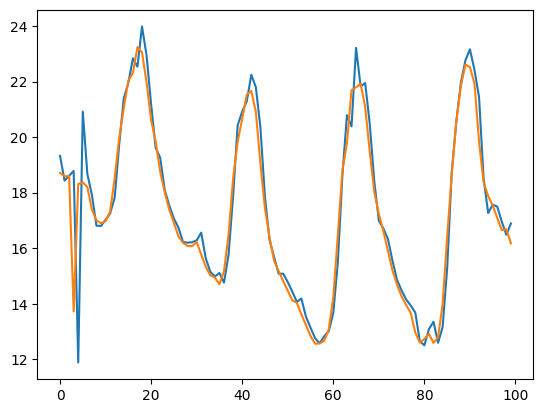

In [24]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [25]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,Test Predictions,Actuals
0,35.659092,36.55
1,37.082832,37.05
2,37.208961,37.70
3,37.900543,38.11
4,38.145126,37.92
...,...,...
23217,17.803038,18.89
23218,18.138298,18.94
23219,19.248978,18.98
23220,19.258299,19.00


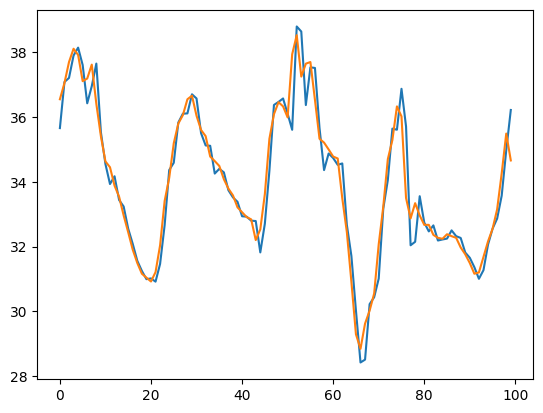

In [26]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [27]:
# Split

In [28]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(       Predictions  Actuals
 0        35.659092    36.55
 1        37.082832    37.05
 2        37.208961    37.70
 3        37.900543    38.11
 4        38.145126    37.92
 ...            ...      ...
 23217    17.803038    18.89
 23218    18.138298    18.94
 23219    19.248978    18.98
 23220    19.258299    19.00
 23221    19.178030    18.59
 
 [23222 rows x 2 columns],
 0.49157077621929146)

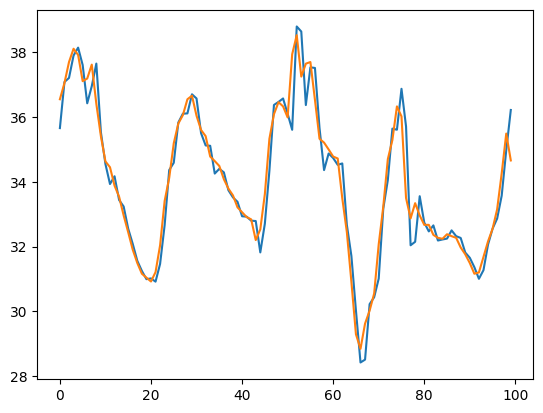

In [29]:
plot_predictions1(model1, X_test1, y_test1)

In [30]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
os.makedirs('model2', exist_ok=True)

cp2 = ModelCheckpoint('model2/model_checkpoint.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [32]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 194.0855 - root_mean_squared_error: 12.9412 - val_loss: 2.3619 - val_root_mean_squared_error: 1.5369
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.4064 - root_mean_squared_error: 1.5465 - val_loss: 1.0613 - val_root_mean_squared_error: 1.0302
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1.3997 - root_mean_squared_error: 1.1827 - val_loss: 0.7702 - val_root_mean_squared_error: 0.8776
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.1682 - root_mean_squared_error: 1.0800 - val_loss: 0.6517 - val_root_mean_squared_error: 0.8073
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1417 - root_mean_squared_error: 1.0672 - val_loss: 0.5869 - val_root_mean_squared_error: 0.7661
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.0244 - root_mean_squared_error: 1.0117 - val_loss: 0.5640 - val_root_mean_squared_error: 0.7510
Epoch 7/10
2177/2177 ━━━━━━━━━━━━━━━

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(       Predictions  Actuals
 0        35.602386    36.55
 1        37.002323    37.05
 2        37.189472    37.70
 3        37.934261    38.11
 4        38.109516    37.92
 ...            ...      ...
 23217    18.750875    18.89
 23218    18.487230    18.94
 23219    18.994350    18.98
 23220    19.108044    19.00
 23221    19.146355    18.59
 
 [23222 rows x 2 columns],
 0.49718940862142913)

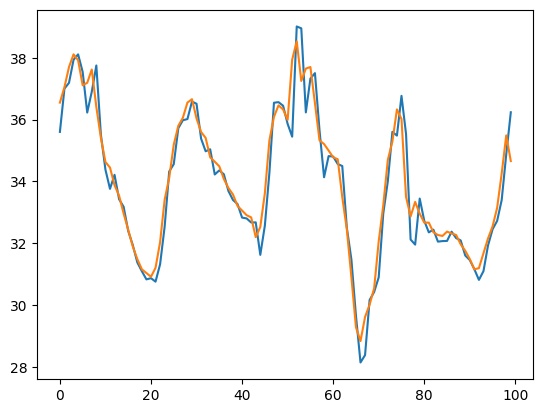

In [33]:
plot_predictions1(model2, X_test1, y_test1)

In [34]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
os.makedirs('model3', exist_ok=True)

cp3 = ModelCheckpoint('model3/model_checkpoint.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [36]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 302.8801 - root_mean_squared_error: 16.8274 - val_loss: 3.6594 - val_root_mean_squared_error: 1.9129
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 3.6073 - root_mean_squared_error: 1.8844 - val_loss: 0.7126 - val_root_mean_squared_error: 0.8442
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 1.1156 - root_mean_squared_error: 1.0559 - val_loss: 0.5826 - val_root_mean_squared_error: 0.7633
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.9228 - root_mean_squared_error: 0.9594 - val_loss: 0.5509 - val_root_mean_squared_error: 0.7422
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.8958 - root_mean_squared_error: 0.9458 - val_loss: 0.5395 - val_root_mean_squared_error: 0.7345
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.9522 - root_mean_squared_error: 0.9751 - val_loss: 0.5321 - val_root_mean_squared_error: 0.7295
Epoch 7/10
2177/2177 ━━━━━━━━━━

In [37]:
temp

,Temp (degree C)
From Date,
2010-01-01 00:00:00,11.70
2010-01-01 01:00:00,11.50
2010-01-01 02:00:00,11.10
2010-01-01 03:00:00,10.47
2010-01-01 04:00:00,10.04
...,...
2023-03-31 19:00:00,18.89
2023-03-31 20:00:00,18.94
2023-03-31 21:00:00,18.98


In [38]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
From Date,,
2010-01-01 00:00:00,11.70,1.262304e+09
2010-01-01 01:00:00,11.50,1.262308e+09
2010-01-01 02:00:00,11.10,1.262311e+09
2010-01-01 03:00:00,10.47,1.262315e+09
2010-01-01 04:00:00,10.04,1.262318e+09
...,...,...
2023-03-31 19:00:00,18.89,1.680289e+09
2023-03-31 20:00:00,18.94,1.680293e+09
2023-03-31 21:00:00,18.98,1.680296e+09


In [39]:
day = 24*60*60 #no. of sec in a day
year = (365.2425)*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
From Date,,,,,,
2010-01-01 00:00:00,11.70,1.262304e+09,-4.416858e-12,1.000000,0.005161,0.999987
2010-01-01 01:00:00,11.50,1.262308e+09,2.588190e-01,0.965926,0.005878,0.999983
2010-01-01 02:00:00,11.10,1.262311e+09,5.000000e-01,0.866025,0.006594,0.999978
2010-01-01 03:00:00,10.47,1.262315e+09,7.071068e-01,0.707107,0.007311,0.999973
2010-01-01 04:00:00,10.04,1.262318e+09,8.660254e-01,0.500000,0.008028,0.999968
...,...,...,...,...,...,...
2023-03-31 19:00:00,18.89,1.680289e+09,-9.659258e-01,0.258819,0.999722,0.023591
2023-03-31 20:00:00,18.94,1.680293e+09,-8.660254e-01,0.500000,0.999738,0.022874
2023-03-31 21:00:00,18.98,1.680296e+09,-7.071068e-01,0.707107,0.999754,0.022158


In [40]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
From Date,,,,,
2010-01-01 00:00:00,11.70,-4.416858e-12,1.000000,0.005161,0.999987
2010-01-01 01:00:00,11.50,2.588190e-01,0.965926,0.005878,0.999983
2010-01-01 02:00:00,11.10,5.000000e-01,0.866025,0.006594,0.999978
2010-01-01 03:00:00,10.47,7.071068e-01,0.707107,0.007311,0.999973
2010-01-01 04:00:00,10.04,8.660254e-01,0.500000,0.008028,0.999968
...,...,...,...,...,...
2023-03-31 19:00:00,18.89,-9.659258e-01,0.258819,0.999722,0.023591
2023-03-31 20:00:00,18.94,-8.660254e-01,0.500000,0.999738,0.022874
2023-03-31 21:00:00,18.98,-7.071068e-01,0.707107,0.999754,0.022158


In [41]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [42]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((116106, 6, 5), (116106,))

In [43]:
train_size = int(len(X2) * 0.6)
val_size = int(len(X2) * 0.2)
X_train2, y_train2 = X2[:train_size], y2[:train_size]
X_val2, y_val2 = X2[train_size:train_size+val_size], y2[train_size:train_size+val_size]
X_test2, y_test2 = X2[train_size+val_size:], y2[train_size+val_size:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape


((69663, 6, 5), (69663,), (23221, 6, 5), (23221,), (23222, 6, 5), (23222,))

In [44]:
temp_training_mean = np.mean(X_train2[:, :, 0])
temp_training_std = np.std(X_train2[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [45]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

array([[[ 7.49112274e-01,  8.66025404e-01,  5.00000000e-01,
         -5.72317784e-01, -8.20031923e-01],
        [ 7.74062215e-01,  9.65925826e-01,  2.58819045e-01,
         -5.72905421e-01, -8.19621485e-01],
        [ 8.32278743e-01,  1.00000000e+00,  4.47484145e-12,
         -5.73492764e-01, -8.19210626e-01],
        [ 9.59404631e-01,  9.65925826e-01, -2.58819045e-01,
         -5.74079812e-01, -8.18799346e-01],
        [ 1.07346150e+00,  8.66025404e-01, -5.00000000e-01,
         -5.74666566e-01, -8.18387645e-01],
        [ 1.11979711e+00,  7.07106781e-01, -7.07106781e-01,
         -5.75253024e-01, -8.17975524e-01]],

       [[ 7.74062215e-01,  9.65925826e-01,  2.58819045e-01,
         -5.72905421e-01, -8.19621485e-01],
        [ 8.32278743e-01,  1.00000000e+00,  4.47484145e-12,
         -5.73492764e-01, -8.19210626e-01],
        [ 9.59404631e-01,  9.65925826e-01, -2.58819045e-01,
         -5.74079812e-01, -8.18799346e-01],
        [ 1.07346150e+00,  8.66025404e-01, -5.00000000e-01,
  

In [46]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
os.makedirs('model4', exist_ok=True)

cp4 = ModelCheckpoint('model4/model_checkpoint.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [48]:
model4.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp4])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 466.0367 - root_mean_squared_error: 21.1910 - val_loss: 16.3171 - val_root_mean_squared_error: 4.0394
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 13.4515 - root_mean_squared_error: 3.6418 - val_loss: 2.5779 - val_root_mean_squared_error: 1.6056
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 3.5385 - root_mean_squared_error: 1.8788 - val_loss: 1.3307 - val_root_mean_squared_error: 1.1536
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.0202 - root_mean_squared_error: 1.4212 - val_loss: 0.9765 - val_root_mean_squared_error: 0.9882
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 1.6369 - root_mean_squared_error: 1.2790 - val_loss: 0.8607 - val_root_mean_squared_error: 0.9278
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 1.3550 - root_mean_squared_error: 1.1637 - val_loss: 0.6907 - val_root_mean_squared_error: 0.8311
Epoch 7/10
2177/2177 ━━━━━━━━

726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


(       Predictions  Actuals
 0        35.564598    36.55
 1        36.419674    37.05
 2        36.811958    37.70
 3        37.284706    38.11
 4        37.547092    37.92
 ...            ...      ...
 23217    19.231741    18.89
 23218    18.703762    18.94
 23219    18.818283    18.98
 23220    18.831730    19.00
 23221    18.818167    18.59
 
 [23222 rows x 2 columns],
 0.4192286602727276)

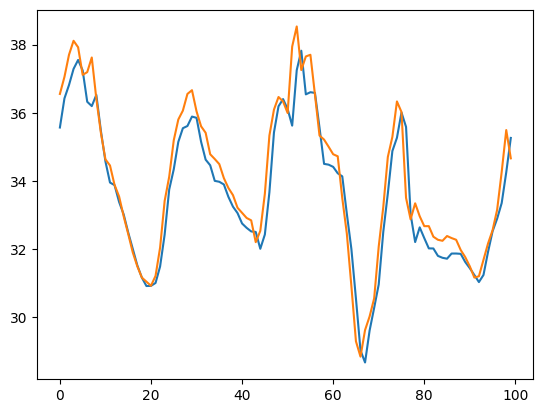

In [49]:
plot_predictions1(model4, X_test2, y_test2)

In [50]:
p_temp_df = pd.concat([df['BP (mmHg)'], temp_df], axis=1)
p_temp_df

,BP (mmHg),Temperature,Day sin,Day cos,Year sin,Year cos
From Date,,,,,,
2010-01-01 00:00:00,957.94,11.70,-4.416858e-12,1.000000,0.005161,0.999987
2010-01-01 01:00:00,956.52,11.50,2.588190e-01,0.965926,0.005878,0.999983
2010-01-01 02:00:00,952.03,11.10,5.000000e-01,0.866025,0.006594,0.999978
2010-01-01 03:00:00,962.79,10.47,7.071068e-01,0.707107,0.007311,0.999973
2010-01-01 04:00:00,969.16,10.04,8.660254e-01,0.500000,0.008028,0.999968
...,...,...,...,...,...,...
2023-03-31 19:00:00,700.05,18.89,-9.659258e-01,0.258819,0.999722,0.023591
2023-03-31 20:00:00,700.05,18.94,-8.660254e-01,0.500000,0.999738,0.022874
2023-03-31 21:00:00,700.05,18.98,-7.071068e-01,0.707107,0.999754,0.022158


In [51]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [52]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((116105, 7, 6), (116105, 2))

In [53]:
train_size = int(len(X3) * 0.6)
val_size = int(len(X3) * 0.2)
X_train3, y_train3 = X3[:train_size], y3[:train_size]
X_val3, y_val3 = X3[train_size:train_size+val_size], y3[train_size:train_size+val_size]
X_test3, y_test3 = X3[train_size+val_size:], y3[train_size+val_size:]
X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape

((69663, 7, 6),
 (69663, 2),
 (23221, 7, 6),
 (23221, 2),
 (23221, 7, 6),
 (23221, 2))

In [54]:
p_training_mean3 = np.mean(X_train3[:, :, 0])
p_training_std3 = np.std(X_train3[:, :, 0])

temp_training_mean3 = np.mean(X_train3[:, :, 1])
temp_training_std3 = np.std(X_train3[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [55]:
preprocess3(X_train3)
preprocess3(X_val3)
preprocess3(X_test3)

array([[[-1.08389589e+01,  7.49112181e-01,  8.66025404e-01,
          5.00000000e-01, -5.72317784e-01, -8.20031923e-01],
        [-1.08302093e+01,  7.74062381e-01,  9.65925826e-01,
          2.58819045e-01, -5.72905421e-01, -8.19621485e-01],
        [-1.08172933e+01,  8.32279515e-01,  1.00000000e+00,
          4.47484145e-12, -5.73492764e-01, -8.19210626e-01],
        ...,
        [-1.07977110e+01,  1.07346479e+00,  8.66025404e-01,
         -5.00000000e-01, -5.74666566e-01, -8.18387645e-01],
        [-1.07943779e+01,  1.11980087e+00,  7.07106781e-01,
         -7.07106781e-01, -5.75253024e-01, -8.17975524e-01],
        [-1.07906281e+01,  1.24692808e+00,  5.00000000e-01,
         -8.66025404e-01, -5.75839187e-01, -8.17562983e-01]],

       [[-1.08302093e+01,  7.74062381e-01,  9.65925826e-01,
          2.58819045e-01, -5.72905421e-01, -8.19621485e-01],
        [-1.08172933e+01,  8.32279515e-01,  1.00000000e+00,
          4.47484145e-12, -5.73492764e-01, -8.19210626e-01],
        [-1.08014

In [56]:
preprocess_output(y_train3)
preprocess_output(y_val3)
preprocess_output(y_test3)

array([[-10.79354458,   1.30633332],
       [-10.80229412,   1.38356013],
       [-10.81646004,   1.43227243],
       ...,
       [-12.35846235,  -0.84057202],
       [-12.35846235,  -0.83819581],
       [-12.35846235,  -0.88690811]])

In [57]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
os.makedirs('model5', exist_ok=True)

cp5 = ModelCheckpoint('model5/model_checkpoint.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [59]:
model5.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp5])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.4147 - root_mean_squared_error: 0.6234 - val_loss: 13.0230 - val_root_mean_squared_error: 3.6087
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0836 - root_mean_squared_error: 0.2887 - val_loss: 3.4223 - val_root_mean_squared_error: 1.8500
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0599 - root_mean_squared_error: 0.2444 - val_loss: 1.6558 - val_root_mean_squared_error: 1.2868
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0575 - root_mean_squared_error: 0.2393 - val_loss: 0.9201 - val_root_mean_squared_error: 0.9592
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0521 - root_mean_squared_error: 0.2277 - val_loss: 0.7345 - val_root_mean_squared_error: 0.8571
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.0526 - root_mean_squared_error: 0.2287 - val_loss: 0.6657 - val_root_mean_squared_error: 0.8159
Epoch 7/10
2177/2177 ━━━━━━━━━━━━

In [60]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.651120,1.306333,-9.204924,-10.793545
1,0.724286,1.383560,-8.995130,-10.802294
2,0.775296,1.432272,-8.835411,-10.816460
3,0.786773,1.409698,-8.756366,-10.836042
4,0.735790,1.313462,-8.767410,-10.846042
...,...,...,...,...
23216,-0.610751,-0.851265,-10.508051,-12.358462
23217,-0.687569,-0.845324,-10.511717,-12.358462
23218,-0.740376,-0.840572,-10.497610,-12.358462
23219,-0.763734,-0.838196,-10.499198,-12.358462


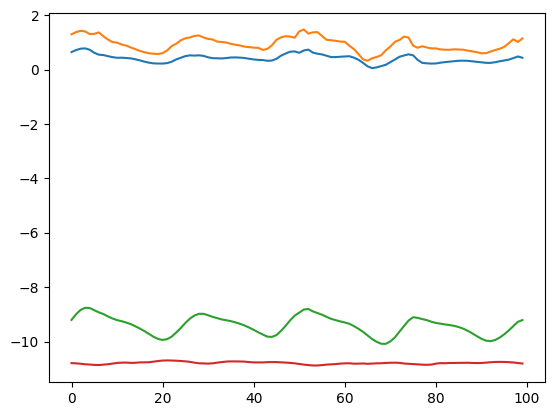

In [61]:
plot_predictions2(model5, X_test3, y_test3)

In [62]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [63]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  return df

In [64]:
post_processed_df = get_predictions_postprocessed(model5, X_test3, y_test3)
post_processed_df

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,31.535225,37.05,775.738892,737.61
1,32.151043,37.70,780.774231,737.40
2,32.580379,38.11,784.607666,737.06
3,32.676979,37.92,786.504883,736.59
4,32.247868,37.11,786.239807,736.35
...,...,...,...,...
23216,20.914349,18.89,744.462219,700.05
23217,20.267786,18.94,744.374268,700.05
23218,19.823326,18.98,744.712830,700.05
23219,19.626726,19.00,744.674683,700.05


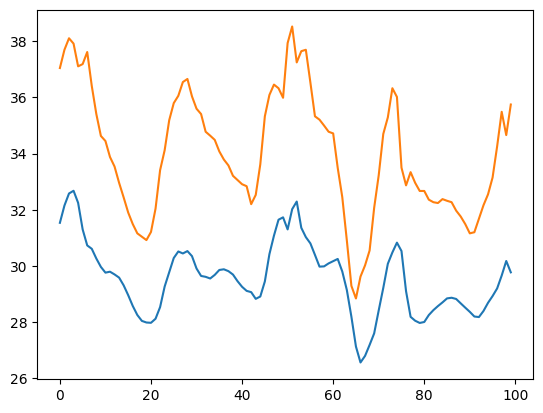

In [65]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

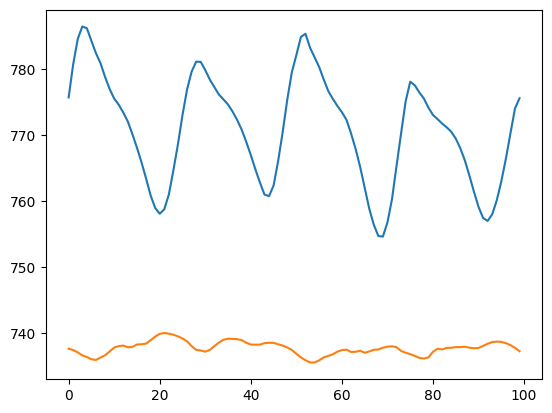

In [66]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [67]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(16))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 7, 32)               │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,282 (32.35 KB)

 Trainable params: 8,282 (32.35 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
os.makedirs('model6', exist_ok=True)
cp6 = ModelCheckpoint('model6/model_checkpoint.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [69]:
model6.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp6])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.5505 - root_mean_squared_error: 0.7265 - val_loss: 24.3910 - val_root_mean_squared_error: 4.9387
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.1111 - root_mean_squared_error: 0.3331 - val_loss: 15.7383 - val_root_mean_squared_error: 3.9672
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - loss: 0.0883 - root_mean_squared_error: 0.2969 - val_loss: 9.6482 - val_root_mean_squared_error: 3.1062
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 0.0794 - root_mean_squared_error: 0.2815 - val_loss: 6.3025 - val_root_mean_squared_error: 2.5105
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 0.0640 - root_mean_squared_error: 0.2524 - val_loss: 4.0500 - val_root_mean_squared_error: 2.0125
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 0.0684 - root_mean_squared_error: 0.2601 - val_loss: 2.7348 - val_root_mean_squared_error: 1.6537
Epoch 7/10
2177/2177 ━━━━━

726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.240346,1.306333,-8.755268,-10.793545
1,0.339059,1.383560,-8.654644,-10.802294
2,0.421887,1.432272,-8.570656,-10.816460
3,0.486128,1.409698,-8.509291,-10.836042
4,0.516126,1.313462,-8.489054,-10.846042
...,...,...,...,...
23216,-0.791686,-0.851265,-9.788047,-12.358462
23217,-0.858086,-0.845324,-9.837849,-12.358462
23218,-0.924531,-0.840572,-9.880227,-12.358462
23219,-0.986783,-0.838196,-9.915429,-12.358462


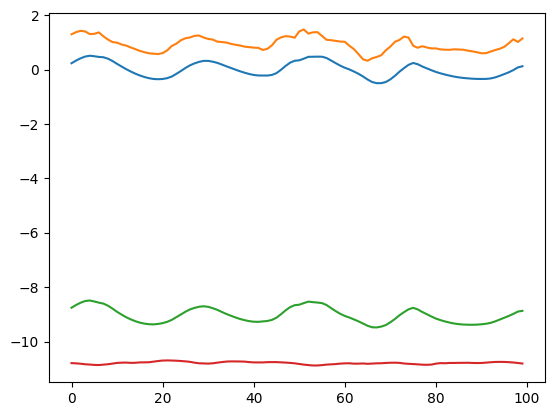

In [70]:
plot_predictions2(model6, X_test3, y_test3)

In [71]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 6, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 8)                   │           3,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,930 (15.35 KB)

 Trainable params: 3,930 (15.35 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
os.makedirs('model7', exist_ok=True)
cp7 = ModelCheckpoint('model7/model_checkpoint.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [73]:
model7.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp7])

Epoch 1/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3206 - root_mean_squared_error: 0.5453 - val_loss: 0.4332 - val_root_mean_squared_error: 0.6582
Epoch 2/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0653 - root_mean_squared_error: 0.2550 - val_loss: 0.3376 - val_root_mean_squared_error: 0.5810
Epoch 3/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0631 - root_mean_squared_error: 0.2508 - val_loss: 0.4198 - val_root_mean_squared_error: 0.6480
Epoch 4/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0546 - root_mean_squared_error: 0.2331 - val_loss: 0.1738 - val_root_mean_squared_error: 0.4169
Epoch 5/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0567 - root_mean_squared_error: 0.2378 - val_loss: 0.1158 - val_root_mean_squared_error: 0.3404
Epoch 6/10
2177/2177 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0530 - root_mean_squared_error: 0.2299 - val_loss: 0.0636 - val_root_mean_squared_error: 0.2521
Epoch 7/10
2177/2177 ━━━━━━━━━━━━━━━━━━━

726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,1.200923,1.306333,-10.508948,-10.793545
1,1.237313,1.383560,-10.508966,-10.802294
2,1.263568,1.432272,-10.509424,-10.816460
3,1.272849,1.409698,-10.524200,-10.836042
4,1.209279,1.313462,-10.558311,-10.846042
...,...,...,...,...
23216,-0.915920,-0.851265,-11.939343,-12.358462
23217,-1.035786,-0.845324,-11.876765,-12.358462
23218,-1.010063,-0.840572,-11.814350,-12.358462
23219,-0.958361,-0.838196,-11.765706,-12.358462


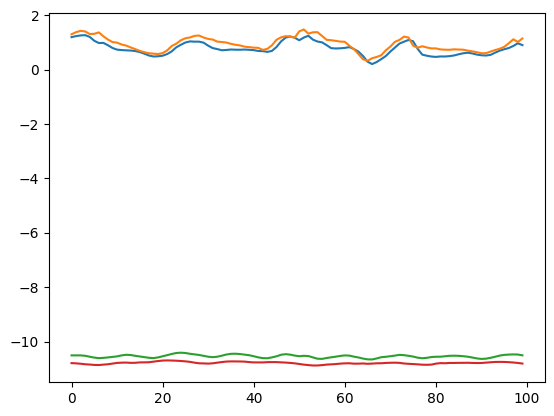

In [74]:
plot_predictions2(model7, X_test3, y_test3)